<h1 align="center" style="background-color:MediumSeaGreen; font-size:48px" ><br> Bike Rental Modeling <br></h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
train = pd.read_csv('/home/woodman/Downloads/bike_rental_clean1.csv')

In [4]:
train = train.drop(["Unnamed: 0"], axis = 1)

In [5]:
train.shape

(717, 9)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 9 columns):
season        717 non-null int64
year          717 non-null int64
month         717 non-null int64
workingday    717 non-null int64
weathersit    717 non-null int64
temp          717 non-null float64
humidity      717 non-null float64
windspeed     717 non-null float64
count         717 non-null float64
dtypes: float64(4), int64(5)
memory usage: 50.5 KB


In [7]:
train.head()

,season,year,month,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,1,0,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,0,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,1,1,0.226957,0.436957,0.186900,1600.0


In [8]:
# Converting into proper datatype
train['season'] = train.season.astype('category')
train['month'] = train.month.astype('category')
train['workingday'] = train.workingday.astype('category')
train['weathersit'] = train.weathersit.astype('category')
train['year'] = train.year.astype('category')
train.dtypes

season        category
year          category
month         category
workingday    category
weathersit    category
temp           float64
humidity       float64
windspeed      float64
count          float64
dtype: object

Encoding Categorical variables since all the categorical variables are nominal.

In [9]:
cat_names = ['season', 'year', 'month','weathersit']

bkr_enc = pd.get_dummies(train,columns=cat_names)

In [11]:
bkr_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 26 columns):
workingday      717 non-null category
temp            717 non-null float64
humidity        717 non-null float64
windspeed       717 non-null float64
count           717 non-null float64
season_1        717 non-null uint8
season_2        717 non-null uint8
season_3        717 non-null uint8
season_4        717 non-null uint8
year_0          717 non-null uint8
year_1          717 non-null uint8
month_1         717 non-null uint8
month_2         717 non-null uint8
month_3         717 non-null uint8
month_4         717 non-null uint8
month_5         717 non-null uint8
month_6         717 non-null uint8
month_7         717 non-null uint8
month_8         717 non-null uint8
month_9         717 non-null uint8
month_10        717 non-null uint8
month_11        717 non-null uint8
month_12        717 non-null uint8
weathersit_1    717 non-null uint8
weathersit_2    717 non-null uint8
weathersi

In [12]:
bkr_enc.columns

Index(['workingday', 'temp', 'humidity', 'windspeed', 'count', 'season_1',
       'season_2', 'season_3', 'season_4', 'year_0', 'year_1', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [13]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [14]:
bkr_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 26 columns):
workingday      717 non-null category
temp            717 non-null float64
humidity        717 non-null float64
windspeed       717 non-null float64
count           717 non-null float64
season_1        717 non-null uint8
season_2        717 non-null uint8
season_3        717 non-null uint8
season_4        717 non-null uint8
year_0          717 non-null uint8
year_1          717 non-null uint8
month_1         717 non-null uint8
month_2         717 non-null uint8
month_3         717 non-null uint8
month_4         717 non-null uint8
month_5         717 non-null uint8
month_6         717 non-null uint8
month_7         717 non-null uint8
month_8         717 non-null uint8
month_9         717 non-null uint8
month_10        717 non-null uint8
month_11        717 non-null uint8
month_12        717 non-null uint8
weathersit_1    717 non-null uint8
weathersit_2    717 non-null uint8
weathersi

In [15]:
Y = bkr_enc["count"].values
X = bkr_enc.drop("count", axis = 1).values


#Splitting the data in train and testing

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [16]:
model_lr = LinearRegression().fit(X_train , y_train)

In [17]:
# predict on train data
pred_train_LR = model_lr.predict(X_train)

In [18]:
pred_test_LR = model_lr.predict(X_test)

In [34]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [37]:
print("summary of predicted counts vs actual counts")
df_describe_predicted = pd.DataFrame(pred_test_LR)
df_describe_actual = pd.DataFrame(y_test)
display_side_by_side(df_describe_predicted.describe(), df_describe_actual.describe())

summary of predicted counts vs actual counts


,0
count,144.000000
mean,4323.157767
std,1822.685684
min,569.659141
25%,2910.931872
50%,4306.904012
75%,5908.972984
max,7301.344298
,0
count,144.000000


In [21]:
# Results on Training data
print("R2 score : %.2f" % r2_score(y_train, pred_train_LR))
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_train, pred_train_LR)))
print("Mean Absolute error: %.2f" % mean_absolute_error(y_train, pred_train_LR))
print("MAPE: %.2f" % MAPE(y_train, pred_train_LR))
print("Accuracy: %.2f" % (100-MAPE(y_train, pred_train_LR)))

R2 score : 0.83
Root Mean squared error: 785.10
Mean Absolute error: 568.23
MAPE: 46.40
Accuracy: 53.60


In [23]:
#results on Testing data
print("R2 score : %.2f" % r2_score(y_test, pred_test_LR))
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, pred_test_LR)))
print("Mean Absolute error: %.2f" % mean_absolute_error(y_test, pred_test_LR))
print("MAPE: %.2f" % MAPE(y_test, pred_test_LR))
print("Accuracy: %.2f" % (100-MAPE(y_test, pred_test_LR)))

R2 score : 0.87
Root Mean squared error: 747.40
Mean Absolute error: 586.44
MAPE: 17.03
Accuracy: 82.97


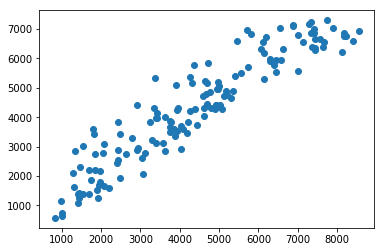

In [38]:
plt.scatter(y_test,pred_test_LR)

## Decision Tree

In [39]:
train.columns

Index(['season', 'year', 'month', 'workingday', 'weathersit', 'temp',
       'humidity', 'windspeed', 'count'],
      dtype='object')

In [45]:
model_dt = DecisionTreeRegressor()

In [46]:
model_dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [49]:
predictions_dt = model_dt.predict(X_test)

In [54]:
print("summary of predicted counts vs actual counts")
df_describe_predicted = pd.DataFrame(predictions_dt)
df_describe_actual = pd.DataFrame(y_test)
display_side_by_side(df_describe_predicted.describe(), df_describe_actual.describe())

summary of predicted counts vs actual counts


,0
count,144.000000
mean,4481.090278
std,2067.971412
min,605.000000
25%,2729.000000
50%,4335.000000
75%,6545.250000
max,8714.000000
,0
count,144.000000


In [50]:
# metrics on test 
print("R2 score : %.2f" % r2_score(y_test, predictions_dt))
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, predictions_dt)))
print("Mean Absolute error: %.2f" % mean_absolute_error(y_test, predictions_dt))
print("MAPE: %.2f" % MAPE(y_test, predictions_dt))
print("Accuracy: %.2f" % (100-MAPE(y_test, predictions_dt)))


R2 score : 0.85
Root Mean squared error: 794.08
Mean Absolute error: 565.86
MAPE: 16.56
Accuracy: 83.44


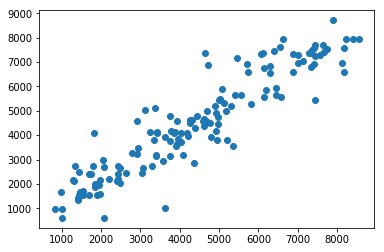

In [63]:
plt.scatter(y_test,predictions_dt)

# KNN

In [64]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
# function to increment n_neighbors one by one and calculate error rate.. 

error_rate=[]
for i in range(1,40):
    knn =KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(np.abs((y_test - pred_i) / y_test))*100)


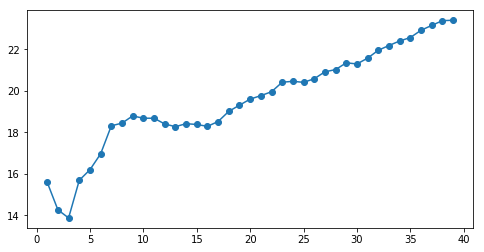

In [66]:
# plot of error rate by the function
plt.figure(figsize=(8,4))
plt.plot(range(1,40),error_rate,marker='o')

In [69]:
model_knn = KNeighborsRegressor(n_neighbors = 4)

In [70]:
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [71]:
predictions_knn = model_knn.predict(X_test)

In [85]:
print("summary of predicted counts vs actual counts")
df_describe_predicted = pd.DataFrame(predictions_knn)
df_describe_actual = pd.DataFrame(y_test)
display_side_by_side(df_describe_predicted.describe(), df_describe_actual.describe())

summary of predicted counts vs actual counts


,0
count,144.000000
mean,4348.609375
std,1914.225811
min,1067.250000
25%,2770.500000
50%,4339.750000
75%,5813.562500
max,7850.750000
,0
count,144.000000


In [72]:
print("R2 score : %.2f" % r2_score(y_test, predictions_knn))
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, predictions_knn)))
print("Mean Absolute error: %.2f" % mean_absolute_error(y_test, predictions_knn))
print("MAPE: %.2f" % MAPE(y_test, predictions_knn))
print("Accuracy: %.2f" % (100-MAPE(y_test, predictions_knn)))

R2 score : 0.88
Root Mean squared error: 725.48
Mean Absolute error: 547.76
MAPE: 15.70
Accuracy: 84.30


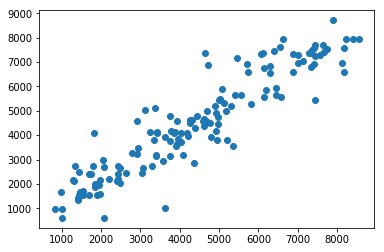

In [73]:
plt.scatter(y_test,predictions)

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
# function to increment n_estimators one by one and calculate error rate.. 
error_rate=[]
for i in range(1,60):
    ran =RandomForestRegressor(n_estimators=i)
    ran.fit(X_train,y_train)
    pred_i=ran.predict(X_test)
    error_rate.append(np.mean(np.abs((y_test - pred_i) / y_test))*100)

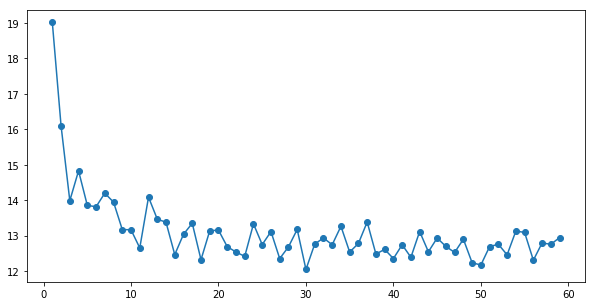

In [117]:
# plot of error rate 
plt.figure(figsize=(10,5))
plt.plot(range(1,60),error_rate,marker='o')

In [118]:
model_rf = RandomForestRegressor(n_estimators =30).fit(X_train,y_train)

In [119]:
predictions_rf = model_rf.predict(X_test)

In [120]:
print("summary of predicted counts vs actual counts")
df_describe_predicted = pd.DataFrame(predictions_rf)
df_describe_actual = pd.DataFrame(y_test)
display_side_by_side(df_describe_predicted.describe(), df_describe_actual.describe())

summary of predicted counts vs actual counts


,0
count,144.000000
mean,4446.132176
std,1919.906868
min,1022.833333
25%,3048.450000
50%,4330.083333
75%,6225.766667
max,7744.100000
,0
count,144.000000


In [121]:
print("R2 score : %.2f" % r2_score(y_test, predictions_rf))
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, predictions_rf)))
print("Mean Absolute error: %.2f" % mean_absolute_error(y_test, predictions_rf))
print("MAPE: %.2f" % MAPE(y_test, predictions_rf))
print("Accuracy: %.2f" % (100-MAPE(y_test, predictions_rf)))

R2 score : 0.92
Root Mean squared error: 597.46
Mean Absolute error: 448.47
MAPE: 12.95
Accuracy: 87.05


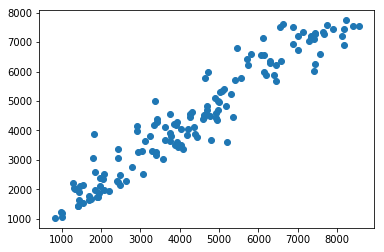

In [122]:
plt.scatter(y_test,predictions_rf)